In [1]:
import torch
import os

from matplotlib import pyplot as plt
from torch.utils.data import DataLoader

from cat_dog_dataset import CatDogDataset
from custom_resnet50 import CustomResNet50
from train_resnet50 import transform_val

In [2]:
val_dataset = CatDogDataset(
    root_dir=os.path.abspath(
        os.path.join(os.path.abspath(""), os.pardir, "data", "Q5", "validation_dataset")
    ),
    transform=transform_val,
)
val_loader = DataLoader(
    val_dataset, batch_size=32, shuffle=False
)

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = CustomResNet50().to(device)
model.load_state_dict(
    torch.load(
        os.path.abspath(
            os.path.join(os.path.abspath(""), os.pardir, "models", "resnet50.pth")
        ),
        map_location=device,
    ),
)

<All keys matched successfully>

In [4]:
model_re = CustomResNet50().to(device)
model_re.load_state_dict(
    torch.load(
        os.path.abspath(
            os.path.join(os.path.abspath(""), os.pardir, "models", "resnet50_re.pth")
        ),
        map_location=device,
    )
)

<All keys matched successfully>

In [5]:
acc_without_random_erasing = 0

model.eval()
with torch.no_grad():
    for i, (inputs, labels) in enumerate(val_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = model(inputs).squeeze()
        acc_without_random_erasing += (outputs.round() == labels).sum().item()

acc_without_random_erasing = acc_without_random_erasing / len(val_dataset)

In [6]:
acc_with_random_erasing = 0

model_re.eval()
with torch.no_grad():
    for i, (inputs, labels) in enumerate(val_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model_re(inputs).squeeze()
        acc_with_random_erasing += (outputs.round() == labels).sum().item()

acc_with_random_erasing = acc_with_random_erasing / len(val_dataset)

In [7]:
print("Accuracy without random erasing: {:.2f}%".format(acc_without_random_erasing * 100))
print("Accuracy with random erasing: {:.2f}%".format(acc_with_random_erasing * 100))

Accuracy without random erasing: 83.44%
Accuracy with random erasing: 88.44%


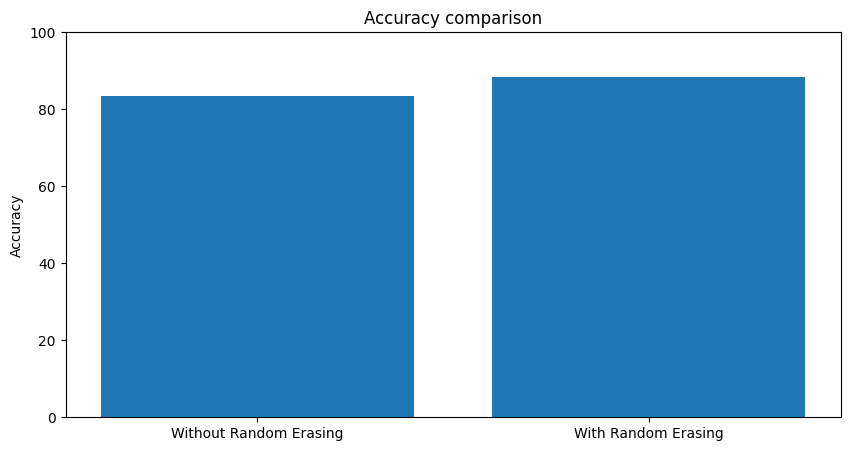

In [8]:
plt.figure(figsize=(10, 5))
plt.bar(
    ["Without Random Erasing", "With Random Erasing"],
    [acc_without_random_erasing * 100, acc_with_random_erasing * 100],
)
plt.title("Accuracy comparison")
plt.ylim(0, 100)
plt.ylabel("Accuracy")

plt.savefig(
    os.path.abspath(
        os.path.join(os.path.abspath(""), os.pardir, "logs", "resnet50_acc_comparison.png")
    )
)

plt.show()